Task-3 (Deep-Dive Analysis & Interactive Dashboarding)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
f = pd.read_csv("products.csv")
f.head()

,OrderID,CustomerID,OrderDate,Region,ProductCategory,Quantity,Sales,Stage
0,O1000,C151,2023-07-14,North,Electronics,2,3540,Purchase
1,O1001,C233,2024-02-21,West,Furniture,1,1290,Checkout
2,O1002,C189,2023-11-03,South,Clothing,3,870,Add to Cart
3,O1003,C145,2023-05-18,East,Electronics,1,4200,Visitors
4,O1004,C278,2024-01-09,North,Furniture,4,1999,Purchase


In [7]:
f['OrderDate'] = pd.to_datetime(f['OrderDate'])
print(f['OrderDate'])

0    2023-07-14
1    2024-02-21
2    2023-11-03
3    2023-05-18
4    2024-01-09
        ...    
95   2023-09-06
96   2024-01-21
97   2023-07-02
98   2023-12-19
99   2024-03-05
Name: OrderDate, Length: 100, dtype: datetime64[ns]


Total Revenue

In [9]:
total_revenue = f['Sales'].sum()
print("Total Revenue:", total_revenue)

Total Revenue: 201099


Average Order Value (AOV)

In [10]:
aov = f['Sales'].sum() / f['OrderID'].nunique()
print("Average Order Value:", aov)

Average Order Value: 2010.99


Customer Churn Rate

In [12]:
active_customers = f['CustomerID'].nunique()

last_date = f['OrderDate'].max()
inactive = f[f['OrderDate'] < last_date - pd.Timedelta(days=90)]

churn_rate = inactive['CustomerID'].nunique() / active_customers
print("Churn Rate:", churn_rate)

Churn Rate: 0.83


Cohort Analysis (Deep-Dive Examples)

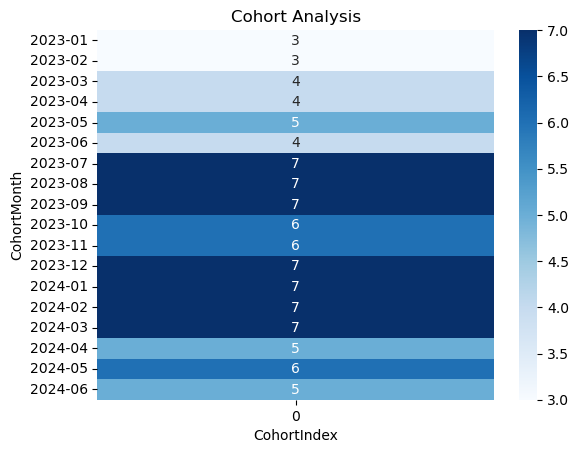

In [13]:
f['OrderMonth'] = f['OrderDate'].dt.to_period('M')

cohort = f.groupby(['CustomerID'])['OrderMonth'].min().reset_index()
cohort.columns = ['CustomerID', 'CohortMonth']

f = f.merge(cohort, on='CustomerID')

f['CohortIndex'] = (f['OrderMonth'] - f['CohortMonth']).apply(lambda x: x.n)

cohort_data = f.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()

cohort_pivot = cohort_data.pivot(index='CohortMonth',
                                 columns='CohortIndex',
                                 values='CustomerID')

sns.heatmap(cohort_pivot, annot=True, fmt='.0f', cmap='Blues')
plt.title("Cohort Analysis")
plt.show()

Funnel Analysis

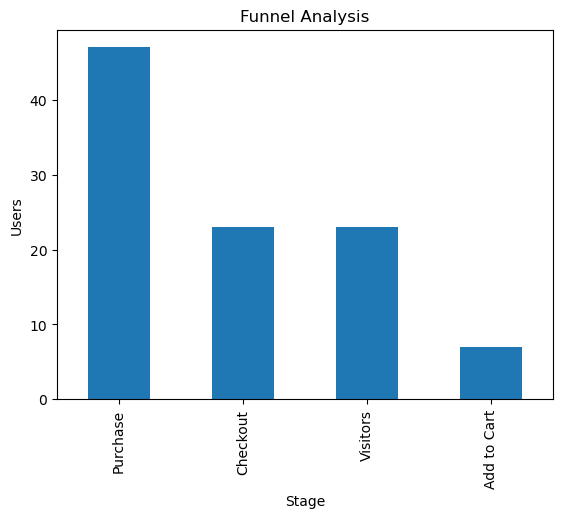

In [14]:
funnel = f['Stage'].value_counts()

plt.figure()
funnel.plot(kind='bar')
plt.title("Funnel Analysis")
plt.ylabel("Users")
plt.show()

Customer Segmentation (Simple RMF)

In [15]:
snapshot_date = f['OrderDate'].max() + pd.Timedelta(days=1)

rfm = f.groupby('CustomerID').agg({
    'OrderDate': lambda x: (snapshot_date - x.max()).days,
    'OrderID': 'nunique',
    'Sales': 'sum'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']

rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
C112,104,1,2750
C129,434,1,2400
C132,338,1,1300
C134,13,1,4800
C135,329,1,520


In [16]:
f.to_csv("cleaned_data.csv", index=False)
rfm.to_csv("rfm_data.csv")